In [75]:
!pip install catboost --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.8 MB/s eta 0:00:00


In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.linear_model import LinearRegression , Ridge , SGDRegressor , Lasso , ElasticNetCV ,HuberRegressor, QuantileRegressor , RANSACRegressor,PoissonRegressor,TweedieRegressor,GammaRegressor
from sklearn.metrics import mean_squared_error,r2_score , root_mean_squared_error
from sklearn.model_selection import train_test_split , cross_val_score , GridSearchCV , RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [2]:
df=pd.read_csv('/content/student-mat.csv')
df

,school,sex,age,address,famsize,Parrent_status,Mother_edu,Father_edu,Mother_job,Father_job,...,Family_quality_reln,freetime_after_school,goout_with_friends,workday_alcohol_consum,weekend_alcohol_consum,health_status,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [3]:
df.isnull().sum()

,0
school,0
sex,0
age,0
address,0
famsize,0
Parrent_status,0
Mother_edu,0
Father_edu,0
Mother_job,0
Father_job,0


In [4]:
for col in df.columns:
  print(f"unique values of {col} : {df[col].unique()}")

unique values of school : ['GP' 'MS']
unique values of sex : ['F' 'M']
unique values of age : [18 17 15 16 19 22 20 21]
unique values of address : ['U' 'R']
unique values of famsize : ['GT3' 'LE3']
unique values of Parrent_status : ['A' 'T']
unique values of Mother_edu : [4 1 3 2 0]
unique values of Father_edu : [4 1 2 3 0]
unique values of Mother_job : ['at_home' 'health' 'other' 'services' 'teacher']
unique values of Father_job : ['teacher' 'other' 'services' 'health' 'at_home']
unique values of reason_to_chose_school : ['course' 'other' 'home' 'reputation']
unique values of guardian : ['mother' 'father' 'other']
unique values of traveltime : [2 1 3 4]
unique values of weekly_studytime : [2 3 1 4]
unique values of failures : [0 3 2 1]
unique values of extra_edu_supp : ['yes' 'no']
unique values of family_edu_supp : ['no' 'yes']
unique values of extra_paid_class : ['no' 'yes']
unique values of extra_curr_activities : ['no' 'yes']
unique values of nursery : ['yes' 'no']
unique values o

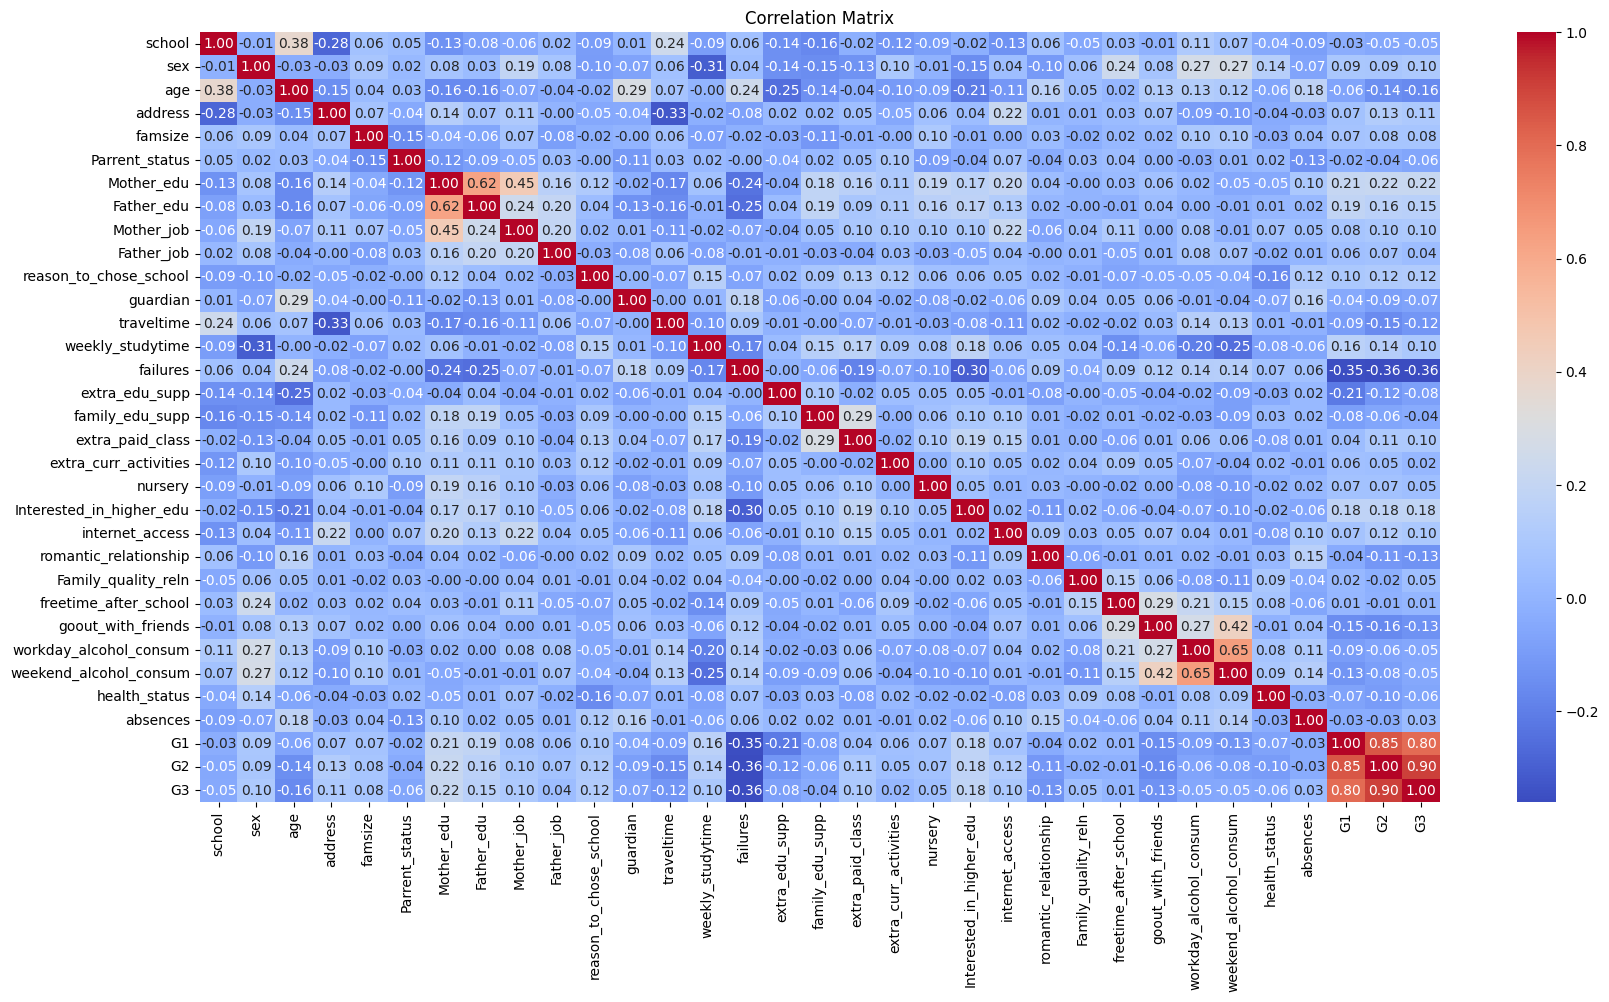

In [5]:
df_plot = df.copy()
df_plot['school'] = df_plot['school'].apply(lambda x : 0 if x=='GP' else 1)
label_mappings = {}
label_enc = LabelEncoder()
for cols in df_plot.select_dtypes(include='object').columns:
  df_plot[cols] = label_enc.fit_transform(df_plot[cols])
  label_mappings[cols] = dict(zip(label_enc.classes_,label_enc.transform(label_enc.classes_)))
corr_matrix = df_plot.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix , annot=True,fmt='.2f',cmap='coolwarm' , cbar=True)
plt.title("Correlation Matrix")
plt.show()

In [6]:
for col , mappings in label_mappings.items():
  print(f"Mapping for column '{col}': {mappings}")

Mapping for column 'sex': {'F': 0, 'M': 1}
Mapping for column 'address': {'R': 0, 'U': 1}
Mapping for column 'famsize': {'GT3': 0, 'LE3': 1}
Mapping for column 'Parrent_status': {'A': 0, 'T': 1}
Mapping for column 'Mother_job': {'at_home': 0, 'health': 1, 'other': 2, 'services': 3, 'teacher': 4}
Mapping for column 'Father_job': {'at_home': 0, 'health': 1, 'other': 2, 'services': 3, 'teacher': 4}
Mapping for column 'reason_to_chose_school': {'course': 0, 'home': 1, 'other': 2, 'reputation': 3}
Mapping for column 'guardian': {'father': 0, 'mother': 1, 'other': 2}
Mapping for column 'extra_edu_supp': {'no': 0, 'yes': 1}
Mapping for column 'family_edu_supp': {'no': 0, 'yes': 1}
Mapping for column 'extra_paid_class': {'no': 0, 'yes': 1}
Mapping for column 'extra_curr_activities': {'no': 0, 'yes': 1}
Mapping for column 'nursery': {'no': 0, 'yes': 1}
Mapping for column 'Interested_in_higher_edu': {'no': 0, 'yes': 1}
Mapping for column 'internet_access': {'no': 0, 'yes': 1}
Mapping for column 

#Making the plots

##plotting  grade vs school

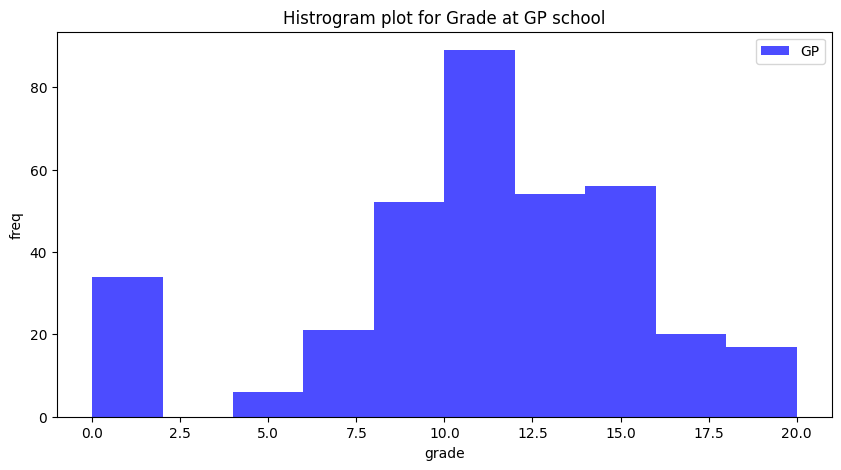

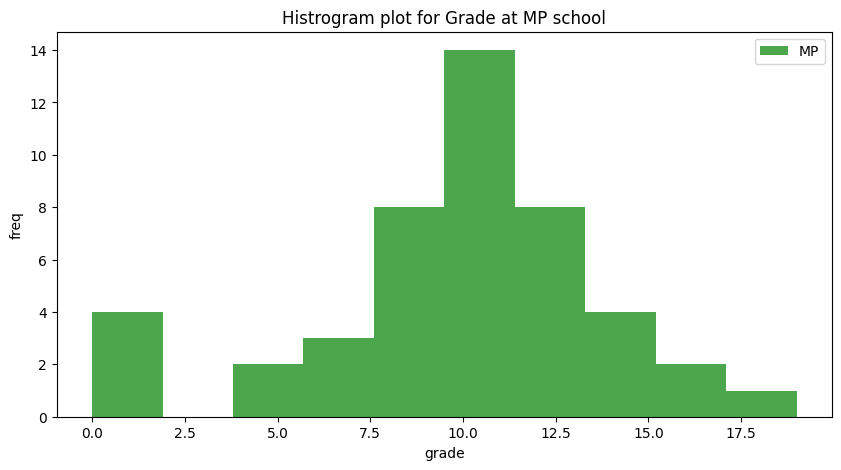

In [7]:
# df_plot['school'] = df_plot['school'].apply(lambda x : 0 if x=='GP' else 1)

df_gp = df_plot[df_plot['school']==0]
df_mp = df_plot[df_plot['school']==1]

plt.figure(figsize=(10,5))
plt.hist(df_gp['G3'] , bins = 10 , color= 'blue' , alpha = 0.7 , label ='GP')
plt.title("Histrogram plot for Grade at GP school")
plt.xlabel("grade")
plt.ylabel("freq")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.hist(df_mp['G3'],bins=10,color='green' , alpha=0.7,label = 'MP')
plt.title("Histrogram plot for Grade at MP school")
plt.xlabel("grade")
plt.ylabel("freq")
plt.legend()
plt.show()

##plotting affect vs all types grade

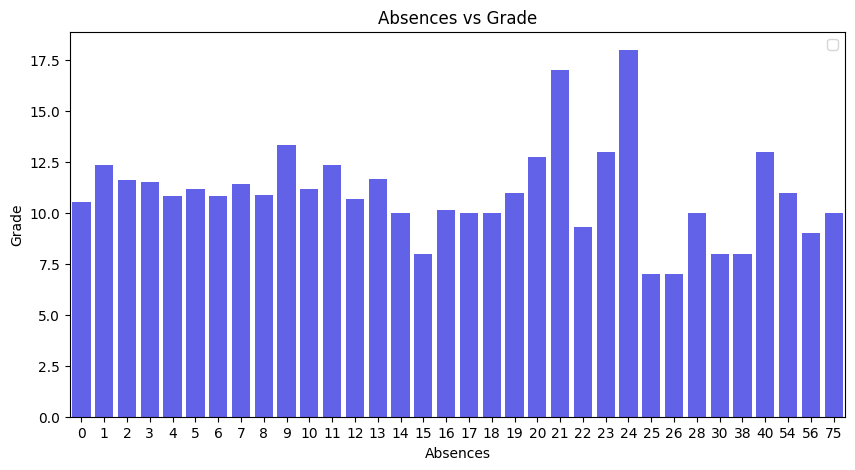

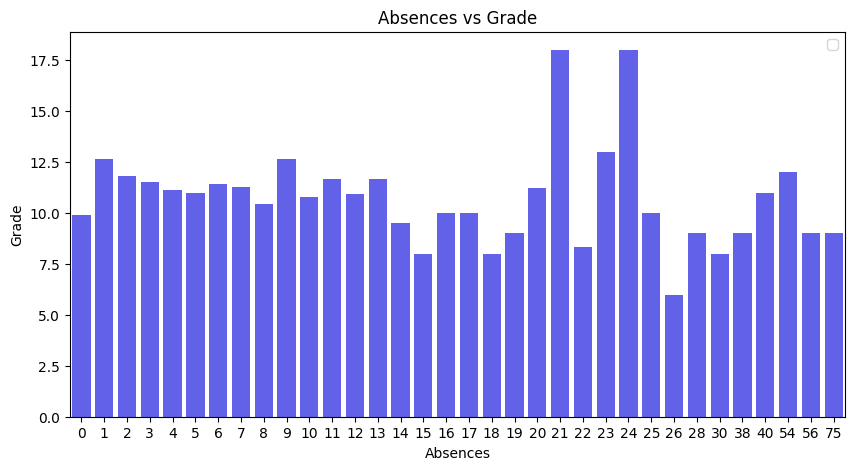

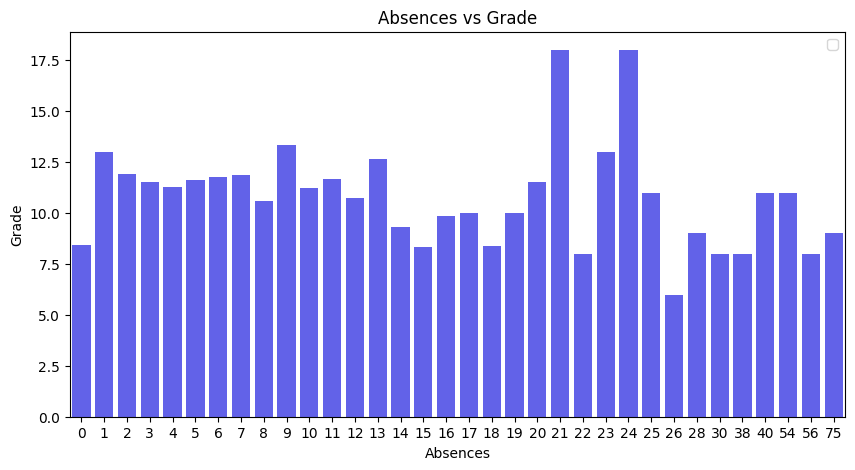

In [8]:
df_agg_g1 = df.groupby('absences' , as_index = False)['G1'].mean()
plt.figure(figsize=(10,5))
sns.barplot(data = df_agg_g1,x='absences',y='G1',color='blue',alpha=0.7)
plt.title("Absences vs Grade")
plt.xlabel("Absences")
plt.ylabel("Grade")
plt.legend()
plt.show()
df_agg_g2 = df.groupby('absences',as_index=False)['G2'].mean()
plt.figure(figsize=(10,5))
sns.barplot(data=df_agg_g2,x='absences',y='G2',color = 'blue' , alpha  = 0.7)
plt.title("Absences vs Grade")
plt.xlabel("Absences")
plt.ylabel("Grade")
plt.legend()
plt.show()
df_agg_g3 = df.groupby('absences' , as_index = False)['G3'].mean()
plt.figure(figsize=(10,5))
sns.barplot(data = df_agg_g3, x='absences' , y = 'G3' , color = 'blue' , alpha  = 0.7)
plt.title("Absences vs Grade")
plt.xlabel("Absences")
plt.ylabel("Grade")
plt.legend()
plt.show()

##KDE of Absence

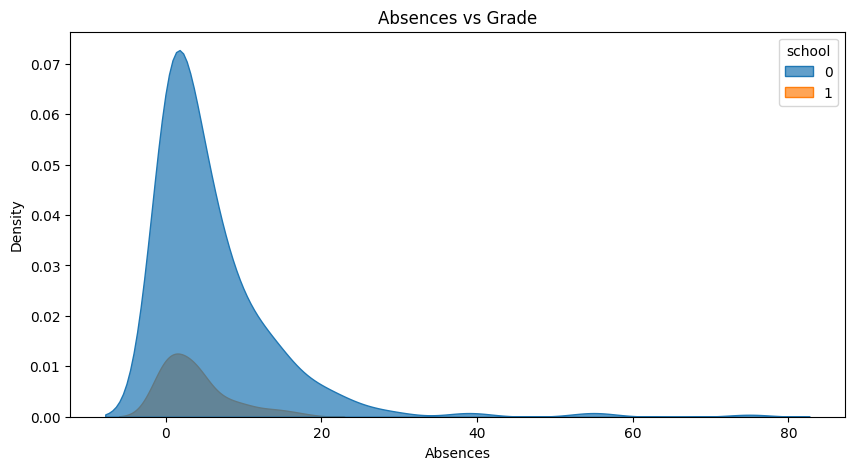

In [9]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=df_plot,x='absences', hue='school',fill=0.5,alpha=0.7)
plt.title("Absences vs Grade")
plt.xlabel("Absences")
plt.show()

##Weekly studytime vs Grade

<ipython-input-10-94fc32eb7a84>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_plot,x='weekly_studytime' , y='G3', palette='muted')


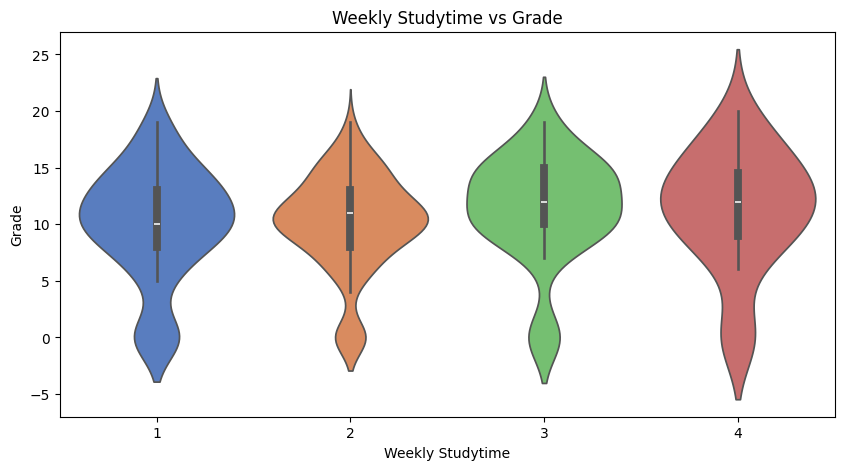

In [10]:
plt.figure(figsize=(10,5))
sns.violinplot(data=df_plot,x='weekly_studytime' , y='G3', palette='muted')
plt.title("Weekly Studytime vs Grade")
plt.xlabel("Weekly Studytime")
plt.ylabel("Grade")
plt.show()

##plotting failures vs all types of grade

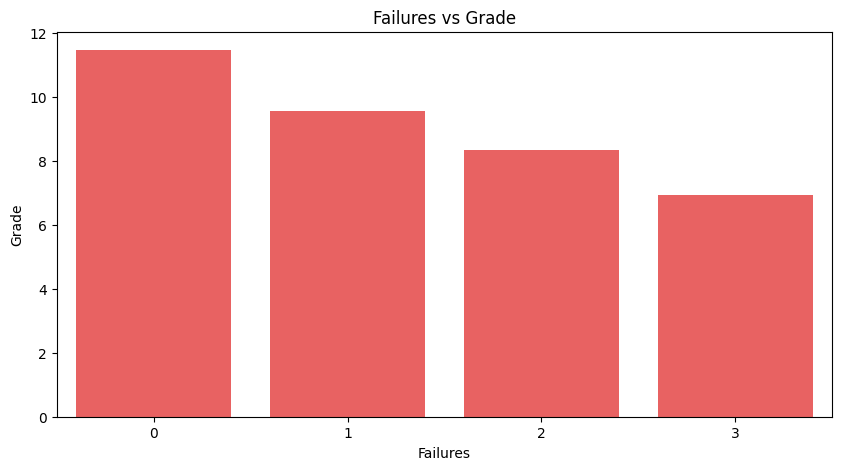

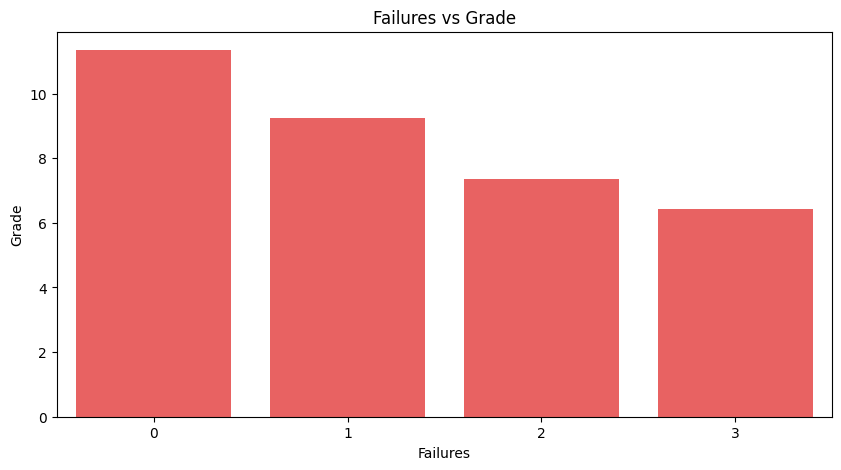

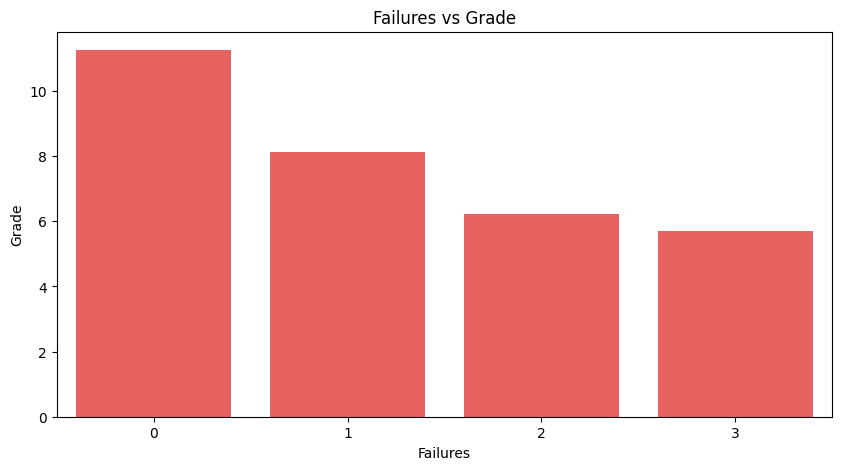

In [11]:
# unique values of failures : [0 3 2 1]
df_agg_f1 = df.groupby('failures' , as_index=False)['G1'].mean()
plt.figure(figsize=(10,5))
sns.barplot(data=df_agg_f1 , x='failures',y='G1',color ='red',alpha=0.7)
plt.title('Failures vs Grade')
plt.xlabel('Failures')
plt.ylabel('Grade')
# plt.legend()
plt.show()
df_agg_f2 = df.groupby('failures' , as_index=False)['G2'].mean()
plt.figure(figsize=(10,5))
sns.barplot(data=df_agg_f2 , x='failures',y='G2',color ='red',alpha=0.7)
plt.title('Failures vs Grade')
plt.xlabel('Failures')
plt.ylabel('Grade')
# plt.legend()
plt.show()
df_agg_f3 = df.groupby('failures' , as_index=False)['G3'].mean()
plt.figure(figsize=(10,5))
sns.barplot(data=df_agg_f3 , x='failures',y='G3',color ='red',alpha=0.7)
plt.title('Failures vs Grade')
plt.xlabel('Failures')
plt.ylabel('Grade')
# plt.legend()
plt.show()

##Sex affect on grade

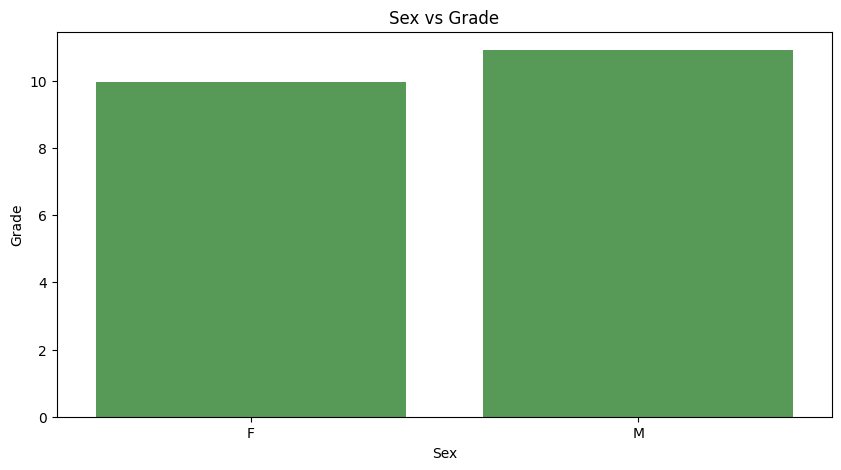

In [12]:
df_agg_sex = df.groupby('sex', as_index=False)['G3'].mean()
plt.figure(figsize=(10,5))
sns.barplot(data=df_agg_sex,x='sex',y='G3', color= 'green',alpha=0.7)
plt.title("Sex vs Grade")
plt.xlabel("Sex")
plt.ylabel("Grade")
plt.show()

## famesize vs Grade barplot

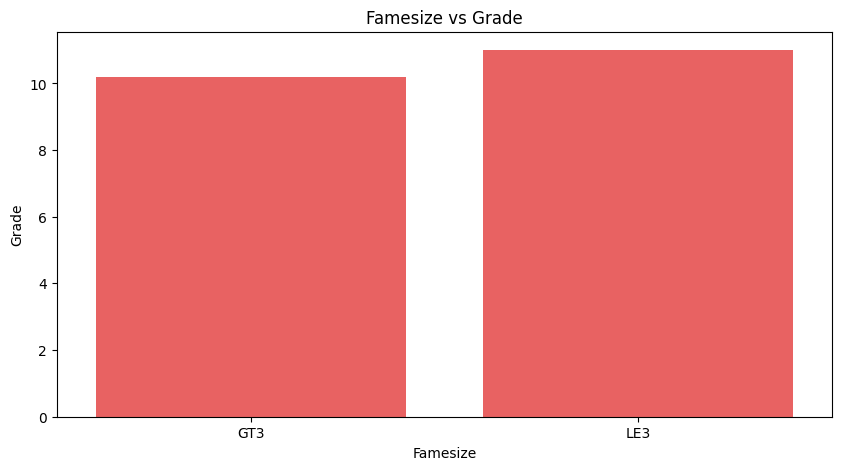

In [13]:
df_agg_famsize = df.groupby('famsize' , as_index=False)['G3'].mean()
plt.figure(figsize=(10,5))
sns.barplot(data=df_agg_famsize,x='famsize' , y='G3',color='red',alpha=0.7)
plt.title('Famesize vs Grade')
plt.xlabel('Famesize')
plt.ylabel('Grade')
plt.show()

##Address vs Grade boxplot

<ipython-input-14-3a02feebf734>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_plot , x='address',y='G3',palette='muted')


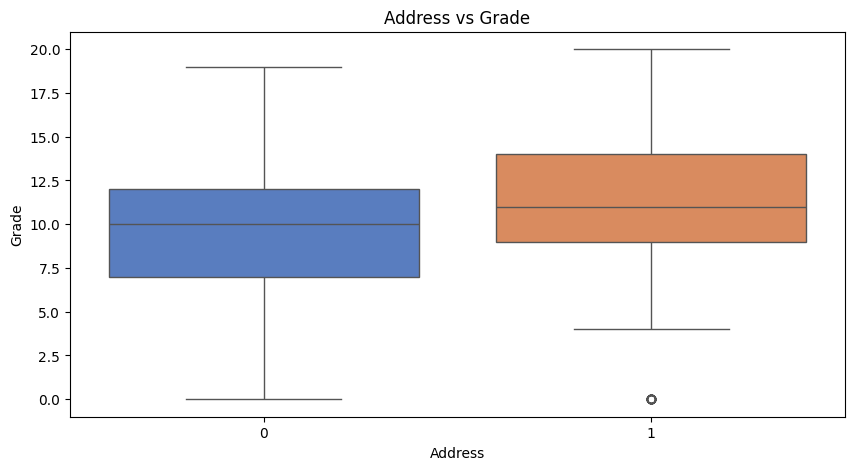

In [14]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_plot , x='address',y='G3',palette='muted')
plt.title('Address vs Grade')
plt.xlabel('Address')
plt.ylabel('Grade')
plt.show()

##interaction plot of weekly study time vs g3 vs failures

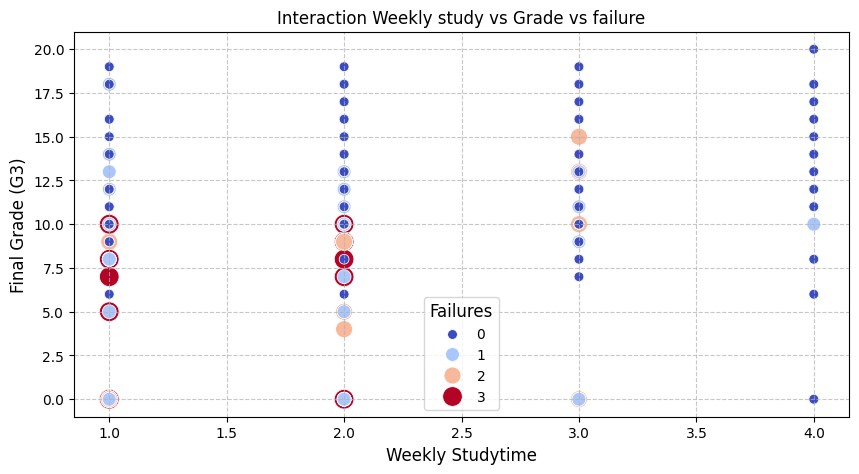

In [15]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_plot,x = 'weekly_studytime',y='G3',hue='failures' , palette='coolwarm',size='failures',sizes=(50,200))
plt.title("Interaction Weekly study vs Grade vs failure")
plt.xlabel("Weekly Studytime", fontsize=12)
plt.ylabel("Final Grade (G3)", fontsize=12)
plt.legend(title="Failures", fontsize=10, title_fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

## Reason to chosee the course, histplot

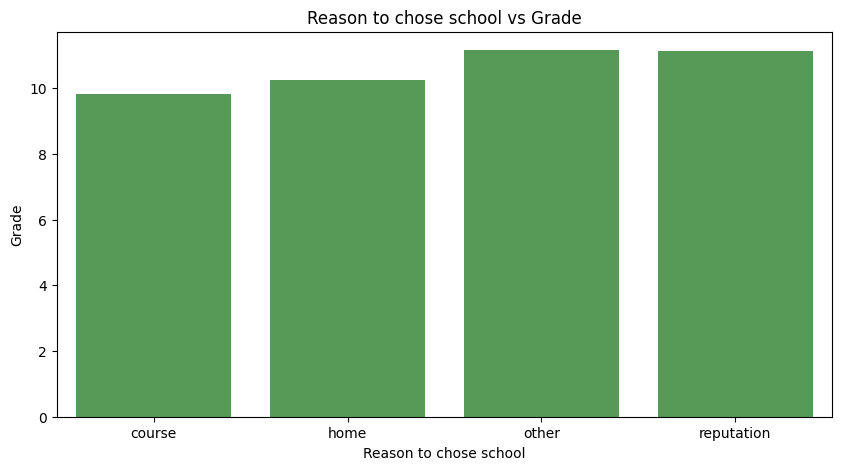

In [16]:
df_agg_reason=df.groupby('reason_to_chose_school',as_index=False)['G3'].mean()
plt.figure(figsize=(10,5))
sns.barplot(data=df_agg_reason,x='reason_to_chose_school',y='G3',color='green',alpha=0.7)
plt.title('Reason to chose school vs Grade')
plt.xlabel('Reason to chose school')
plt.ylabel('Grade')
plt.show()

## Barplot guardian plot

Text(0, 0.5, 'Grade')

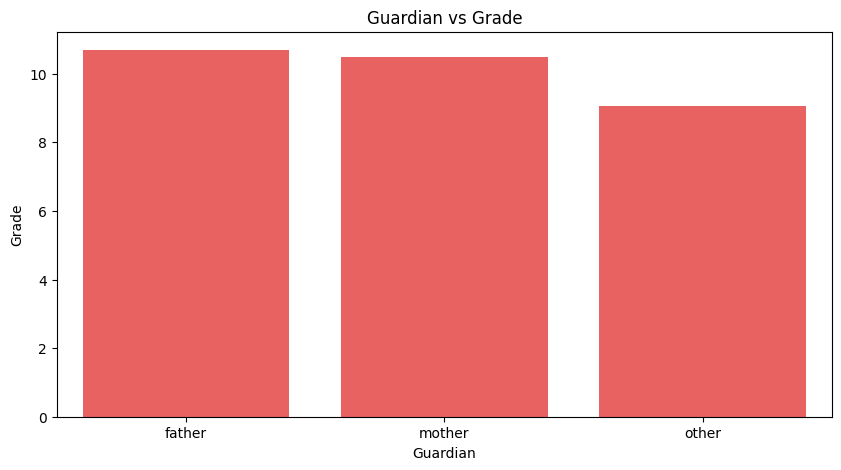

In [17]:
df_agg_guardian=df.groupby('guardian',as_index=False)['G3'].mean()
plt.figure(figsize=(10,5))
sns.barplot(data=df_agg_guardian,x='guardian',y='G3',color='red',alpha=0.7)
plt.title('Guardian vs Grade')
plt.xlabel('Guardian')
plt.ylabel('Grade')

##Mother father job

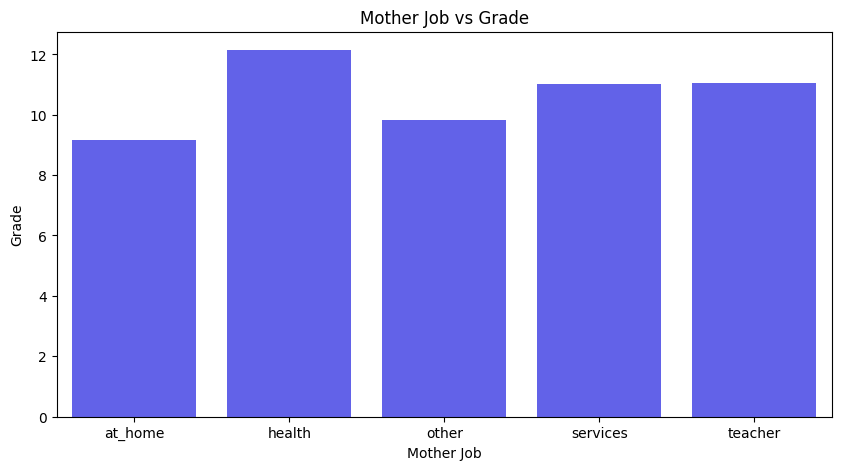

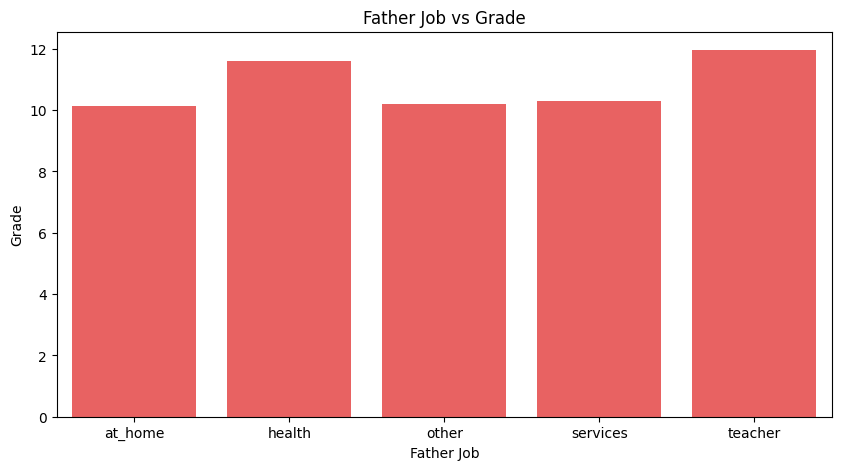

In [18]:
df_agg_job_mother=df.groupby('Mother_job',as_index=False)['G3'].mean()
df_agg_job_father=df.groupby('Father_job',as_index=False)['G3'].mean()
plt.figure(figsize=(10,5))
sns.barplot(data=df_agg_job_mother,x='Mother_job',y='G3',color='blue',alpha=0.7)
plt.title("Mother Job vs Grade")
plt.xlabel("Mother Job")
plt.ylabel("Grade")
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(data=df_agg_job_father,x='Father_job',y='G3',color='red',alpha=0.7)
plt.title("Father Job vs Grade")
plt.xlabel("Father Job")
plt.ylabel("Grade")
plt.show()

##Relationship effect

<ipython-input-19-debb0e54a33a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df_plot,x='romantic_relationship',y='G3',jitter=True,palette='muted')


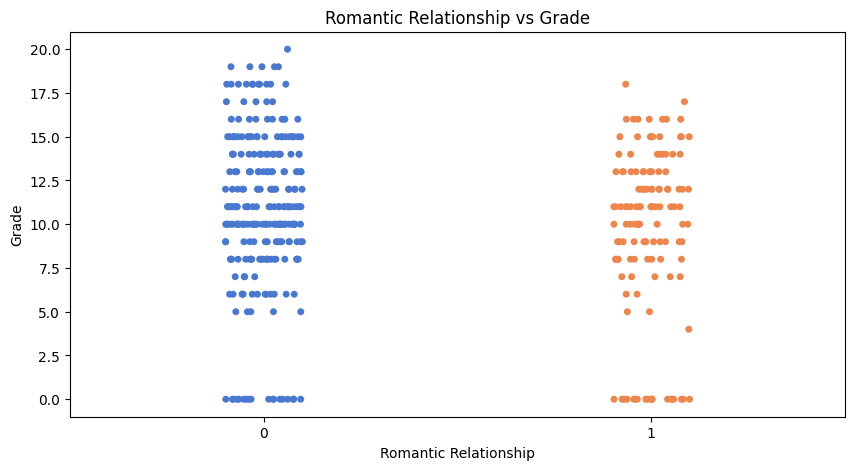

In [19]:
plt.figure(figsize=(10,5))
sns.stripplot(data=df_plot,x='romantic_relationship',y='G3',jitter=True,palette='muted')
plt.title("Romantic Relationship vs Grade")
plt.xlabel("Romantic Relationship")
plt.ylabel("Grade")
plt.show()

##Joint plot go_out_with_friends

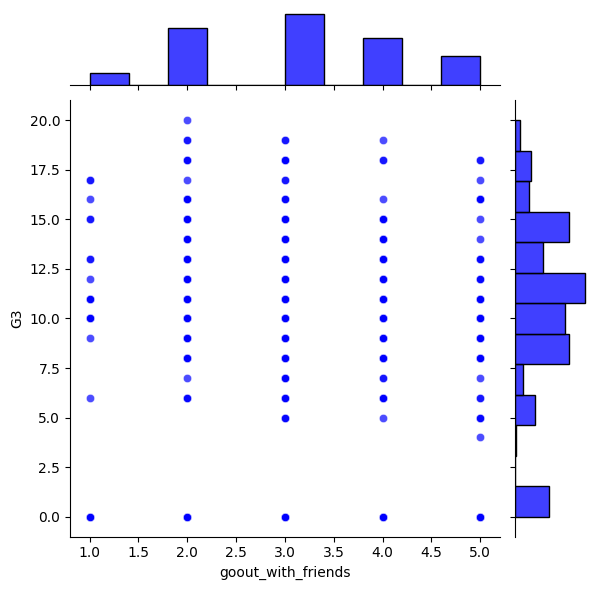

In [20]:
sns.jointplot(data=df_plot,x='goout_with_friends' , y='G3',kind='scatter',color='blue',alpha=0.7)
plt.show()

##Alcohol conmpiution

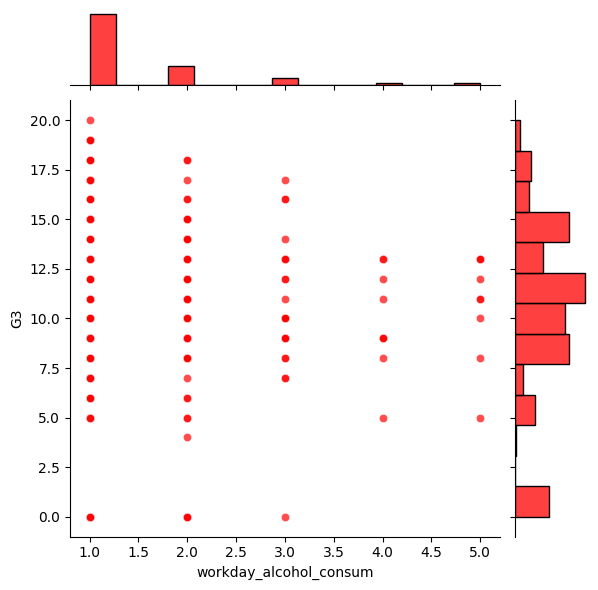

In [21]:
sns.jointplot(data=df_plot,x='workday_alcohol_consum' , y='G3' , color='red' , alpha=0.7 , kind='scatter')
plt.show()

##hisplot health status

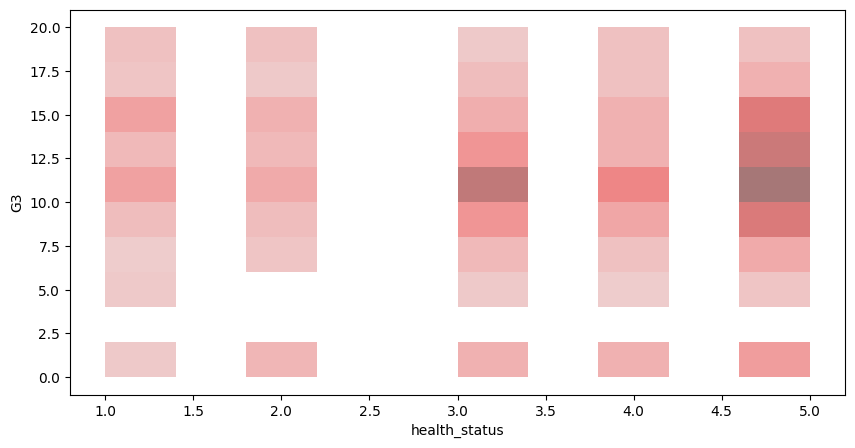

In [22]:
plt.figure(figsize=(10,5))
sns.histplot(data=df_plot , x='health_status',bins=10 , y='G3',color='brown',alpha=0.7,kde=True )
plt.show()

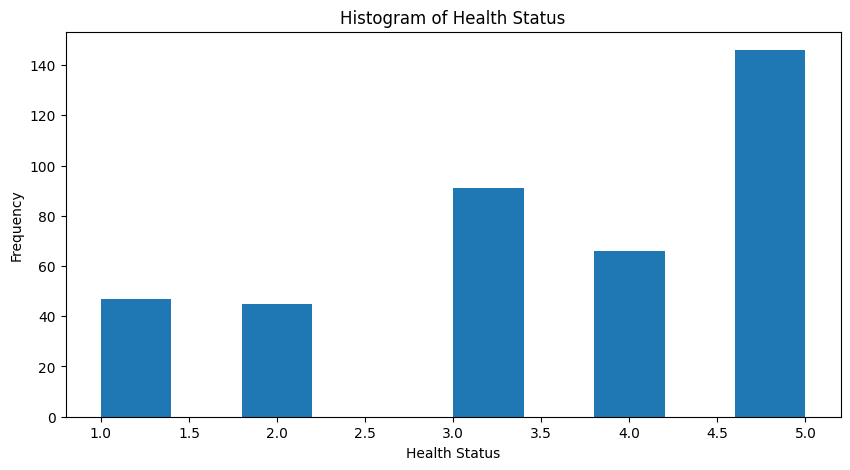

In [23]:
plt.figure(figsize=(10,5))
plt.hist(df_plot['health_status'] , bins =10 , label = 'Health')
plt.title("Histogram of Health Status")
plt.xlabel("Health Status")
plt.ylabel("Frequency")
plt.show()

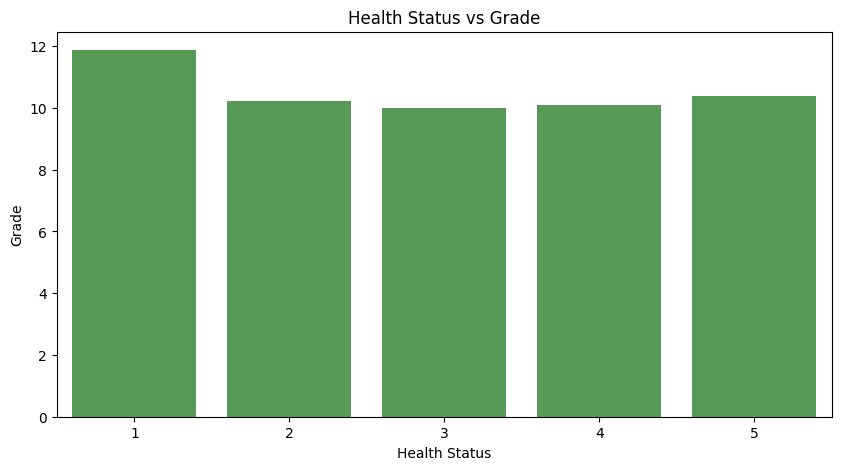

In [24]:
df_agg_h = df.groupby('health_status' , as_index=False)['G3'].mean()
plt.figure(figsize=(10,5))
sns.barplot(data=df_agg_h , x='health_status' , y='G3',color='green',alpha=0.7)
plt.title('Health Status vs Grade')
plt.xlabel('Health Status')
plt.ylabel('Grade')
plt.show()

##age effect

<Figure size 1000x500 with 0 Axes>

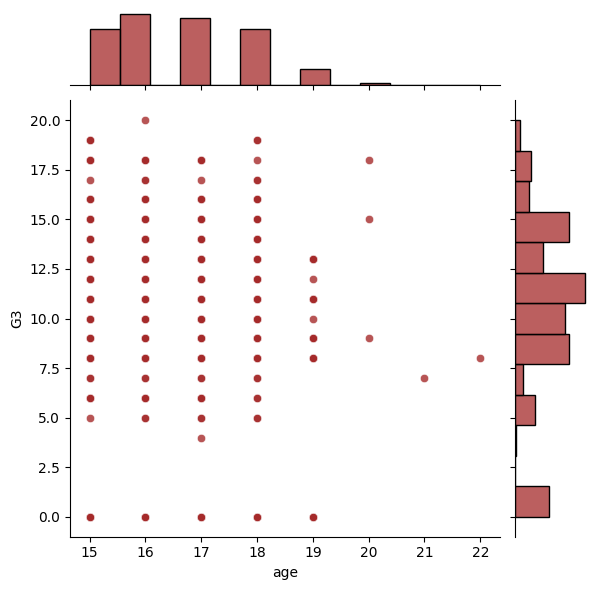

In [25]:
plt.figure(figsize=(10,5))
sns.jointplot(data=df, x = 'age' , y='G3' , kind ='scatter' , color = 'brown' , alpha = 0.8)
plt.show()

In [26]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Parrent_status',
       'Mother_edu', 'Father_edu', 'Mother_job', 'Father_job',
       'reason_to_chose_school', 'guardian', 'traveltime', 'weekly_studytime',
       'failures', 'extra_edu_supp', 'family_edu_supp', 'extra_paid_class',
       'extra_curr_activities', 'nursery', 'Interested_in_higher_edu',
       'internet_access', 'romantic_relationship', 'Family_quality_reln',
       'freetime_after_school', 'goout_with_friends', 'workday_alcohol_consum',
       'weekend_alcohol_consum', 'health_status', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')

#Fitting the model without feature scaling

In [27]:
selected_cols = ['sex', 'age', 'address', 'famsize',
       'Mother_edu', 'Father_edu', 'Mother_job',
       'reason_to_chose_school', 'guardian', 'traveltime', 'weekly_studytime',
       'failures', 'extra_paid_class',
        'Interested_in_higher_edu',
       'internet_access', 'romantic_relationship', 'Family_quality_reln',
         'workday_alcohol_consum',
       'weekend_alcohol_consum', 'health_status', 'absences', 'G1', 'G2',
       'G3']

df_selected = df_plot[selected_cols]
X = df_selected.drop('G3', axis = 1)
y = df_selected['G3']

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y , test_size=0.4 , shuffle=True , random_state=42)

regressors = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'SGDRegressor': SGDRegressor(max_iter=1000, tol=1e-3),
    'Lasso': Lasso(),
    'ElasticNetCV': ElasticNetCV(cv=5),
    'HuberRegressor': HuberRegressor(),
    'QuantileRegressor': QuantileRegressor(quantile=0.5, alpha=0),
    'RANSACRegressor': RANSACRegressor(),
    'PoissonRegressor': PoissonRegressor(),
    'TweedieRegressor': TweedieRegressor(power=1.5),
    'GammaRegressor': GammaRegressor()
}

results = {}
for name, models in regressors.items():
  try:
      models.fit(X_train,y_train)
      y_pred = models.predict(X_test)
      mse_loss = mean_squared_error(y_pred,y_test)
      r2 = r2_score(y_pred,y_test)
      results[name] = {'MSE' : mse_loss , 'r2' : r2}
      print(f"{name}: MSE = {mse_loss:.3f}, R2 = {r2:.3f}")

  except Exception as e :
    print(f"{name} failed with error: {e}")

results_df = pd.DataFrame(results).T
results_df

LinearRegression: MSE = 4.112, R2 = 0.778
Ridge: MSE = 4.095, R2 = 0.779
SGDRegressor: MSE = 40206553517433040.000, R2 = -0.048
Lasso: MSE = 4.169, R2 = 0.725
ElasticNetCV: MSE = 3.870, R2 = 0.787
HuberRegressor: MSE = 4.320, R2 = 0.725
QuantileRegressor: MSE = 4.468, R2 = 0.686


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:343: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


RANSACRegressor: MSE = 4.722, R2 = 0.687
PoissonRegressor: MSE = 5.580, R2 = 0.728
TweedieRegressor: MSE = 7.004, R2 = 0.735
GammaRegressor failed with error: Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/glm.py:285: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/glm.py:285: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


,MSE,r2
LinearRegression,4.111721e+00,0.778290
Ridge,4.094742e+00,0.778979
SGDRegressor,4.020655e+16,-0.048162
Lasso,4.168788e+00,0.725188
ElasticNetCV,3.869696e+00,0.786784
HuberRegressor,4.320161e+00,0.725061
QuantileRegressor,4.468354e+00,0.686481
RANSACRegressor,4.721938e+00,0.687000
PoissonRegressor,5.579824e+00,0.728283
TweedieRegressor,7.004176e+00,0.735277


#Feature Scaling

In [29]:
std_scaler = StandardScaler()
x_train_scaled = std_scaler.fit_transform(X_train)
x_test_scaled = std_scaler.transform(X_test)


regressors = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'SGDRegressor': SGDRegressor(max_iter=1000, tol=1e-3),
    'Lasso': Lasso(),
    'ElasticNetCV': ElasticNetCV(cv=5),
    'HuberRegressor': HuberRegressor(),
    'QuantileRegressor': QuantileRegressor(quantile=0.5, alpha=0),
    'RANSACRegressor': RANSACRegressor(),
    'PoissonRegressor': PoissonRegressor(),
    'TweedieRegressor': TweedieRegressor(power=1.5),
    'GammaRegressor': GammaRegressor()
}

results = {}
for name, models in regressors.items():
  try:
      models.fit(x_train_scaled,y_train)
      y_pred = models.predict(x_test_scaled)
      mse_loss = mean_squared_error(y_pred,y_test)
      r2 = r2_score(y_pred,y_test)
      results[name] = {'MSE' : mse_loss , 'r2' : r2}
      print(f"{name}: MSE = {mse_loss:.3f}, R2 = {r2:.3f}")

  except Exception as e :
    print(f"{name} failed with error: {e}")

results_df = pd.DataFrame(results).T
results_df

LinearRegression: MSE = 4.112, R2 = 0.778
Ridge: MSE = 4.117, R2 = 0.777
SGDRegressor: MSE = 4.179, R2 = 0.775
Lasso: MSE = 5.388, R2 = 0.443
ElasticNetCV: MSE = 4.043, R2 = 0.764
HuberRegressor: MSE = 4.294, R2 = 0.728
QuantileRegressor: MSE = 4.468, R2 = 0.686
RANSACRegressor: MSE = 4.622, R2 = 0.704
PoissonRegressor: MSE = 5.395, R2 = 0.705
TweedieRegressor: MSE = 5.408, R2 = 0.678
GammaRegressor failed with error: Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.


,MSE,r2
LinearRegression,4.111721,0.778290
Ridge,4.117053,0.777038
SGDRegressor,4.178603,0.775121
Lasso,5.387580,0.443330
ElasticNetCV,4.042913,0.763905
HuberRegressor,4.294076,0.727991
QuantileRegressor,4.468354,0.686481
RANSACRegressor,4.621723,0.704087
PoissonRegressor,5.395331,0.704718
TweedieRegressor,5.407500,0.678124


#More Tuning features (Did not work)

In [30]:
selected_cols = ['sex', 'age', 'address', 'famsize',
       'Mother_edu', 'Father_edu', 'Mother_job',
       'reason_to_chose_school', 'weekly_studytime',
       'failures', 'extra_paid_class',
       'internet_access', 'romantic_relationship',
         'workday_alcohol_consum',
       'weekend_alcohol_consum', 'health_status', 'absences', 'G1', 'G2',
       'G3']

df_selected = df_plot[selected_cols]
X = df_selected.drop('G3', axis = 1)
y = df_selected['G3']

##Without scaling

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y , test_size=0.4 , shuffle=True , random_state=42)

regressors = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'SGDRegressor': SGDRegressor(max_iter=1000, tol=1e-3),
    'Lasso': Lasso(),
    'ElasticNetCV': ElasticNetCV(cv=5),
    'HuberRegressor': HuberRegressor(),
    'QuantileRegressor': QuantileRegressor(quantile=0.5, alpha=0),
    'RANSACRegressor': RANSACRegressor(),
    'PoissonRegressor': PoissonRegressor(),
    'TweedieRegressor': TweedieRegressor(power=1.5),
    'GammaRegressor': GammaRegressor()
}

results = {}
for name, models in regressors.items():
  try:
      models.fit(X_train,y_train)
      y_pred = models.predict(X_test)
      mse_loss = mean_squared_error(y_pred,y_test)
      r2 = r2_score(y_pred,y_test)
      results[name] = {'MSE' : mse_loss , 'r2' : r2}
      print(f"{name}: MSE = {mse_loss:.3f}, R2 = {r2:.3f}")

  except Exception as e :
    print(f"{name} failed with error: {e}")

results_df = pd.DataFrame(results).T
results_df

LinearRegression: MSE = 4.110, R2 = 0.776
Ridge: MSE = 4.104, R2 = 0.776
SGDRegressor: MSE = 2666966253329756160.000, R2 = -0.017
Lasso: MSE = 4.169, R2 = 0.725
ElasticNetCV: MSE = 3.973, R2 = 0.779
HuberRegressor: MSE = 4.344, R2 = 0.721
QuantileRegressor: MSE = 4.468, R2 = 0.686


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:343: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


RANSACRegressor: MSE = 5.573, R2 = 0.615
PoissonRegressor: MSE = 5.553, R2 = 0.731
TweedieRegressor: MSE = 6.969, R2 = 0.733
GammaRegressor failed with error: Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/glm.py:285: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


,MSE,r2
LinearRegression,4.109714e+00,0.775794
Ridge,4.104174e+00,0.775937
SGDRegressor,2.666966e+18,-0.016986
Lasso,4.168788e+00,0.725188
ElasticNetCV,3.972663e+00,0.779077
HuberRegressor,4.343828e+00,0.721418
QuantileRegressor,4.468354e+00,0.686481
RANSACRegressor,5.572609e+00,0.615475
PoissonRegressor,5.552878e+00,0.730969
TweedieRegressor,6.969420e+00,0.733483


##With scaling

In [32]:
std_scaler = StandardScaler()
x_train_scaled = std_scaler.fit_transform(X_train)
x_test_scaled = std_scaler.transform(X_test)


regressors = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'SGDRegressor': SGDRegressor(max_iter=1000, tol=1e-3),
    'Lasso': Lasso(),
    'ElasticNetCV': ElasticNetCV(cv=5),
    'HuberRegressor': HuberRegressor(max_iter=2000),
    'QuantileRegressor': QuantileRegressor(quantile=0.5, alpha=0),
    'RANSACRegressor': RANSACRegressor(),
    'PoissonRegressor': PoissonRegressor(),
    'TweedieRegressor': TweedieRegressor(power=1.5),
    'GammaRegressor': GammaRegressor()
}

results = {}
for name, models in regressors.items():
  try:
      models.fit(x_train_scaled,y_train)
      y_pred = models.predict(x_test_scaled)
      mse_loss = mean_squared_error(y_pred,y_test)
      r2 = r2_score(y_pred,y_test)
      results[name] = {'MSE' : mse_loss , 'r2' : r2}
      print(f"{name}: MSE = {mse_loss:.3f}, R2 = {r2:.3f}")

  except Exception as e :
    print(f"{name} failed with error: {e}")

results_df = pd.DataFrame(results).T
results_df

LinearRegression: MSE = 4.110, R2 = 0.776
Ridge: MSE = 4.115, R2 = 0.775
SGDRegressor: MSE = 4.156, R2 = 0.773
Lasso: MSE = 5.388, R2 = 0.443
ElasticNetCV: MSE = 4.093, R2 = 0.765
HuberRegressor: MSE = 4.351, R2 = 0.721
QuantileRegressor: MSE = 4.468, R2 = 0.686
RANSACRegressor: MSE = 5.038, R2 = 0.611
PoissonRegressor: MSE = 5.286, R2 = 0.704
TweedieRegressor: MSE = 5.369, R2 = 0.677
GammaRegressor failed with error: Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.


,MSE,r2
LinearRegression,4.109714,0.775794
Ridge,4.114878,0.774556
SGDRegressor,4.155828,0.773233
Lasso,5.387580,0.443330
ElasticNetCV,4.093223,0.764676
HuberRegressor,4.351463,0.721249
QuantileRegressor,4.468354,0.686481
RANSACRegressor,5.038384,0.611071
PoissonRegressor,5.286458,0.704240
TweedieRegressor,5.368761,0.676820


#Hyperparameter Tuning

##Without scaling

In [46]:
selected_cols = ['sex', 'age', 'address', 'famsize',
       'Mother_edu', 'Father_edu', 'Mother_job',
       'reason_to_chose_school', 'guardian', 'traveltime', 'weekly_studytime',
       'failures', 'extra_paid_class',
        'Interested_in_higher_edu',
       'internet_access', 'romantic_relationship', 'Family_quality_reln',
         'workday_alcohol_consum',
       'weekend_alcohol_consum', 'health_status', 'absences', 'G1', 'G2',
       'G3']

df_selected = df_plot[selected_cols]
X = df_selected.drop('G3', axis = 1)
y = df_selected['G3']

In [34]:
regressors = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'SGDRegressor': SGDRegressor(max_iter=1000, tol=1e-3),
    'Lasso': Lasso(),
    'ElasticNetCV': ElasticNetCV(cv=5),
    'HuberRegressor': HuberRegressor(max_iter=2000),
    'QuantileRegressor': QuantileRegressor(quantile=0.5, alpha=0),
    'RANSACRegressor': RANSACRegressor(),
    'PoissonRegressor': PoissonRegressor(),
    'TweedieRegressor': TweedieRegressor(power=1.5),
    'GammaRegressor': GammaRegressor()
}

In [61]:
X_train,X_test,y_train,y_test = train_test_split(X,y , test_size=0.25 , shuffle=True , random_state=42)
print(X_test.shape , y_test.shape)

(99, 23) (99,)


In [69]:
param_grids = {
    'LinearRegression': {},
    'Ridge': {'alpha': np.linspace(0.0001, 10, 50)},
    'SGDRegressor': {'alpha': np.linspace(0.00001,100,50), 'penalty': ['l2', 'l1', 'elasticnet']},
    'Lasso': {'alpha': np.linspace(0.00001,100,50)},
    'ElasticNetCV': {'l1_ratio': np.linspace(0.1, 0.9, 10)},
    'HuberRegressor': {'epsilon': [1.1, 1.35, 1.5]},
    'QuantileRegressor': {'alpha': [0.001, 0.01, 0.1, 1]},
    'RANSACRegressor': {'min_samples':np.linspace(0.01, 0.9, 10), 'residual_threshold': [1, 5, 10]},
    'PoissonRegressor': {'alpha': [0.01, 0.1, 1, 10]},
    'TweedieRegressor': {'alpha': [0.01, 0.1, 1], 'power': [1, 1.5, 2]},
    'GammaRegressor': {'alpha': [0.01, 0.1, 1, 10]}
}

results_GridSearch = {}
results_GridSearchRandom = {}


for name,model in regressors.items():
  try:
    param_model = param_grids[name]
    grid_search = GridSearchCV(model,param_model,scoring='neg_mean_squared_error',cv=4,n_jobs=4)
    grid_search.fit(X_train,y_train)
    best_model_GridSearch=grid_search.best_estimator_
    y_pred_GridSearch = best_model_GridSearch.predict(X_test)
    mse = mean_squared_error(y_test,y_pred_GridSearch)
    r2=r2_score(y_test,y_pred_GridSearch)
    root_mean = root_mean_squared_error(y_test,y_pred_GridSearch)
    results_GridSearch[name] = {'mse' : mse , 'r2_score' : r2 , 'rmse':root_mean}

    #RNDGRID
    grid_search_rand = RandomizedSearchCV(model,param_model,scoring='neg_mean_squared_error',cv=4,n_jobs=4)
    grid_search_rand.fit(X_train,y_train)
    best_model_rand=grid_search_rand.best_estimator_
    y_pred_rand = best_model_rand.predict(X_test)
    mse=mean_squared_error(y_test,y_pred_rand)
    r2=r2_score(y_test,y_pred_rand)
    root_mean = root_mean_squared_error(y_test,y_pred_rand)
    results_GridSearchRandom[name]={'mse' : mse , 'r2_score' : r2,'rmse' : root_mean}

  except Exception as e :
      print(f"Failed {name} with error {e}")


resutls_df_random =pd.DataFrame(results_GridSearchRandom).T
results_df_search = pd.DataFrame(results_GridSearch).T

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/

Failed GammaRegressor with error 
All the 16 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/glm.py", line 224, in fit
    raise ValueError(
ValueError: Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
12 fits failed out of a total of 36.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/glm.py", line 224, in fit
    raise ValueError(
ValueError: Some value(s) of y are out of the valid rang

In [68]:
print(results_df_search)
print(resutls_df_random)

                         mse  r2_score      rmse
LinearRegression    4.310661  0.812888  2.076213
Ridge               4.184835  0.818350  2.045687
SGDRegressor       38.833748 -0.685650  6.231673
Lasso               4.168253  0.819069  2.041630
ElasticNetCV        4.173556  0.818839  2.042928
HuberRegressor      4.499208  0.804704  2.121134
QuantileRegressor   4.595960  0.800504  2.143819
RANSACRegressor     4.518965  0.803846  2.125786
PoissonRegressor    5.480758  0.762098  2.341102
TweedieRegressor    5.837604  0.746608  2.416113
                           mse   r2_score       rmse
LinearRegression      4.310661   0.812888   2.076213
Ridge                 4.184835   0.818350   2.045687
SGDRegressor       1390.039479 -59.337196  37.283233
Lasso                 4.168253   0.819069   2.041630
ElasticNetCV          4.173556   0.818839   2.042928
HuberRegressor        4.499208   0.804704   2.121134
QuantileRegressor     4.595960   0.800504   2.143819
RANSACRegressor       4.389537   0.80

##With feature Scaling

In [70]:
std_scaler = StandardScaler()
x_train_scaled = std_scaler.fit_transform(X_train)
x_test_scaled = std_scaler.transform(X_test)

regressors = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'SGDRegressor': SGDRegressor(max_iter=1000, tol=1e-3),
    'Lasso': Lasso(),
    'ElasticNetCV': ElasticNetCV(cv=5),
    'HuberRegressor': HuberRegressor(max_iter=2000),
    'QuantileRegressor': QuantileRegressor(quantile=0.5, alpha=0),
    'RANSACRegressor': RANSACRegressor(),
    'PoissonRegressor': PoissonRegressor(),
    'TweedieRegressor': TweedieRegressor(power=1.5),
    'GammaRegressor': GammaRegressor()
}

In [71]:
param_grids = {
    'LinearRegression': {},
    'Ridge': {'alpha': np.linspace(0.0001, 10, 50)},
    'SGDRegressor': {'alpha': np.linspace(0.00001,100,50), 'penalty': ['l2', 'l1', 'elasticnet']},
    'Lasso': {'alpha': np.linspace(0.00001,100,50)},
    'ElasticNetCV': {'l1_ratio': np.linspace(0.1, 0.9, 10)},
    'HuberRegressor': {'epsilon': [1.1, 1.35, 1.5]},
    'QuantileRegressor': {'alpha': [0.001, 0.01, 0.1, 1]},
    'RANSACRegressor': {'min_samples':np.linspace(0.01, 0.9, 10), 'residual_threshold': [1, 5, 10]},
    'PoissonRegressor': {'alpha': [0.01, 0.1, 1, 10]},
    'TweedieRegressor': {'alpha': [0.01, 0.1, 1], 'power': [1, 1.5, 2]},
    'GammaRegressor': {'alpha': [0.01, 0.1, 1, 10]}
}

results_GridSearch = {}
results_GridSearchRandom = {}

for name,model in regressors.items():
  try:
    param_model = param_grids[name]
    grid_search = GridSearchCV(model,param_model,scoring='neg_mean_squared_error',cv=3,n_jobs=4)
    grid_search.fit(x_train_scaled,y_train)
    best_model_GridSearch=grid_search.best_estimator_
    y_pred_GridSearch = best_model_GridSearch.predict(x_test_scaled)
    mse = mean_squared_error(y_test,y_pred_GridSearch)
    r2=r2_score(y_test,y_pred_GridSearch)
    root_mean = root_mean_squared_error(y_test,y_pred_GridSearch)
    results_GridSearch[name] = {'mse' : mse , 'r2_score' : r2 , 'rmse' : root_mean}

    #RNDGRID
    grid_search_rand = RandomizedSearchCV(model,param_model,scoring='neg_mean_squared_error',cv=3,n_jobs=4)
    grid_search_rand.fit(x_train_scaled,y_train)
    best_model_rand=grid_search_rand.best_estimator_
    y_pred_rand = best_model_rand.predict(x_test_scaled)
    mse= mean_squared_error(y_pred_rand,y_test)
    r2=r2_score(y_test,y_pred_rand)
    root_mean = root_mean_squared_error(y_test,y_pred_rand)
    results_GridSearchRandom[name]={'mse' : mse , 'r2_score' : r2 , 'rmse':root_mean}

  except Exception as e :
      print(f"Failed {name} with error {e}")

results_df_search = pd.DataFrame(results_GridSearch).T
resutls_df_random =pd.DataFrame(results_GridSearchRandom).T


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Failed GammaRegressor with error 
All the 12 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/glm.py", line 224, in fit
    raise ValueError(
ValueError: Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
9 fits failed out of a total of 27.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/glm.py", line 224, in fit
    raise ValueError(
ValueError: Some value(s) of y are out of the valid range 

In [72]:
print(results_df_search)
print(resutls_df_random)

                        mse  r2_score      rmse
LinearRegression   4.310661  0.812888  2.076213
Ridge              4.310661  0.812888  2.076213
SGDRegressor       4.311116  0.812868  2.076323
Lasso              4.310629  0.812889  2.076205
ElasticNetCV       4.208477  0.817323  2.051457
HuberRegressor     4.499214  0.804703  2.121135
QuantileRegressor  4.595960  0.800504  2.143819
RANSACRegressor    4.545209  0.802707  2.131950
PoissonRegressor   5.477487  0.762240  2.340403
TweedieRegressor   5.477487  0.762240  2.340403
                         mse  r2_score      rmse
LinearRegression    4.310661  0.812888  2.076213
Ridge               4.311352  0.812858  2.076379
SGDRegressor       16.550895  0.281578  4.068279
Lasso               9.129910  0.603700  3.021574
ElasticNetCV        4.208477  0.817323  2.051457
HuberRegressor      4.499214  0.804703  2.121135
QuantileRegressor   4.595960  0.800504  2.143819
RANSACRegressor     4.566956  0.801763  2.137044
PoissonRegressor    5.477487  0

#Trying Ensemble learning

In [ ]:
selected_cols = ['sex', 'age', 'address', 'famsize',
       'Mother_edu', 'Father_edu', 'Mother_job',
       'reason_to_chose_school', 'guardian', 'traveltime', 'weekly_studytime',
       'failures', 'extra_paid_class',
        'Interested_in_higher_edu',
       'internet_access', 'romantic_relationship', 'Family_quality_reln',
         'workday_alcohol_consum',
       'weekend_alcohol_consum', 'health_status', 'absences', 'G1', 'G2',
       'G3']

df_selected = df_plot[selected_cols]
X = df_selected.drop('G3', axis = 1)
y = df_selected['G3']

In [77]:
ensemble_models = {
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "RandomForest": RandomForestRegressor(random_state=42),
    "GradientBoosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, verbosity=0),
    "LightGBM": LGBMRegressor(random_state=42),
    "CatBoost": CatBoostRegressor(random_state=42, verbose=0)
}

In [78]:
X_train,X_test,y_train,y_test = train_test_split(X,y , test_size=0.25 , shuffle=True , random_state=42)
print(X_test.shape , y_test.shape)

(99, 23) (99,)


In [79]:
param_grids = {
    "DecisionTree": {"max_depth": [3, 5, 10, None], "min_samples_split": [2, 5, 10]},
    "RandomForest": {"n_estimators": [50, 100, 200], "max_depth": [3, 5, 10, None]},
    "GradientBoosting": {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 0.2], "max_depth": [3, 5, 10]},
    "XGBoost": {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 0.2], "max_depth": [3, 5, 10]},
    "LightGBM": {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 0.2], "num_leaves": [31, 50, 100]},
    "CatBoost": {"iterations": [50, 100, 200], "learning_rate": [0.01, 0.1, 0.2], "depth": [3, 5, 10]}
}

for name, model in ensemble_models.items():
    try:
        print(f"Training {name}...")
        param_model = param_grids[name]

        # GridSearchCV
        grid_search = GridSearchCV(model, param_model, scoring="neg_mean_squared_error", cv=4, n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_model_GridSearch = grid_search.best_estimator_
        y_pred_GridSearch = best_model_GridSearch.predict(X_test)

        mse_grid = mean_squared_error(y_test, y_pred_GridSearch)
        r2_grid = r2_score(y_test, y_pred_GridSearch)
        results_GridSearch[name] = {"mse": mse_grid, "r2_score": r2_grid}

        # RandomizedSearchCV
        rand_search = RandomizedSearchCV(model, param_model, scoring="neg_mean_squared_error", cv=4, n_jobs=-1, n_iter=10, random_state=42)
        rand_search.fit(X_train, y_train)
        best_model_RandomSearch = rand_search.best_estimator_
        y_pred_RandomSearch = best_model_RandomSearch.predict(X_test)

        mse_rand = mean_squared_error(y_test, y_pred_RandomSearch)
        r2_rand = r2_score(y_test, y_pred_RandomSearch)
        results_GridSearchRandom[name] = {"mse": mse_rand, "r2_score": r2_rand}

    except Exception as e:
        print(f"Failed {name} with error {e}")


results_df_grid = pd.DataFrame(results_GridSearch).T
results_df_random = pd.DataFrame(results_GridSearchRandom).T

Training DecisionTree...
Training RandomForest...
Training GradientBoosting...
Training XGBoost...
Failed XGBoost with error 'super' object has no attribute '__sklearn_tags__'
Training LightGBM...


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The XGBRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags_

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000190 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 132
[LightGBM] [Info] Number of data points in the train set: 296, number of used features: 22
[LightGBM] [Info] Start training from score 10.385135
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000163 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 132
[LightGBM] [Info] Number of data points in the train set: 296, number of used features: 22
[LightGBM] [Info] Start training from score 10.385135
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

In [80]:
print(results_df_grid)
print(results_df_random)

                        mse  r2_score      rmse
LinearRegression   4.310661  0.812888  2.076213
Ridge              4.310661  0.812888  2.076213
SGDRegressor       4.311116  0.812868  2.076323
Lasso              4.310629  0.812889  2.076205
ElasticNetCV       4.208477  0.817323  2.051457
HuberRegressor     4.499214  0.804703  2.121135
QuantileRegressor  4.595960  0.800504  2.143819
RANSACRegressor    4.545209  0.802707  2.131950
PoissonRegressor   5.477487  0.762240  2.340403
TweedieRegressor   5.477487  0.762240  2.340403
DecisionTree       4.016610  0.825652       NaN
RandomForest       2.864069  0.875680       NaN
GradientBoosting   2.535664  0.889935       NaN
LightGBM           2.992347  0.870112       NaN
CatBoost           3.208909  0.860711       NaN
                         mse  r2_score      rmse
LinearRegression    4.310661  0.812888  2.076213
Ridge               4.311352  0.812858  2.076379
SGDRegressor       16.550895  0.281578  4.068279
Lasso               9.129910  0.6037